# A4: Autoencoders and RNNs

In [1]:
# Standard imports
import numpy as np
import Network as Network
import mnist_loader
import matplotlib.pylab as plt
%matplotlib inline
import copy

# Q1: Autoencoder

## (a) Derivative of Cosine Proximity

Loss function is
$$
C ( \vec{y} , \vec{t} ) = \frac{ - \left( \vec{y} \cdot \vec{t} \right) }{ \| \vec{y} \| \ \| \vec{t} \|}
$$
We are given that the output layer uses the identity mapping as an activation function, $\vec{y} = \vec{z}$.

For all $y_i, \ i\in[1, n]$, n is the size of $\vec{y}.$
$$
\frac{\partial}{\partial y_i}C(\vec{y},\vec{t})= - \frac{\frac{\partial}{\partial y_i}\left[\vec{y} \cdot \vec{t}\right] \| \vec{y} \| \|\vec{t} \|  
- \frac{\partial}{\partial y_i}\left[\| \vec{y} \| \|\vec{t} \|\right](\vec{y} \cdot \vec{t})} 
{(\|\vec{y}\| \| \vec{t} \|)^2}
$$
Since $\vec{y}\cdot \vec{t}= y_1t_1+ y_2t_2+\dotsb+y_nt_n$
$$
\frac{\partial}{\partial y_i}\left[\vec{y} \cdot \vec{t}\right]=t_i
$$
Since $\|\vec{y}\| \| \vec{t} \|= \sqrt{(y_1^2+y_2^2+\dotsb+y_n^2)(t_1^2+t_2^2+\dotsb+t_n^2)}$
$$
\frac{\partial}{\partial y_i}\left[\|\vec{y}\| \| \vec{t} \|\right]= \|\vec{t}\| \cdot\frac{1}{2\|\vec{y}\|}\cdot2y_i
$$
So
$$
\begin{align}
\frac{\partial}{\partial y_i}C(\vec{y},\vec{t}) 
&= -\frac{t_i\|\vec{y} \| \|\vec{t}\| - \vec{y}\cdot\vec{t}\cdot\|\vec{t}\|\cdot\frac{2y_i}{2\|\vec{y}\|}}
{(\|\vec{y}\| \| \vec{t} \|)^2} \\
&= -\left(\frac{t_i}{\|\vec{y}\|\|\vec{t}\|}+C(\vec{y},\vec{t})\cdot\frac{y_i}{(\|\vec{y}\|)^2}\right)
\end{align}
$$
Since $E(Y,T)=\langle C(\vec{y},\vec{t})\rangle_{\vec y\in Y,\vec t\in T}$
$$
\frac{\partial E}{\partial \vec{y}}= -\frac{1}{n}\left(C(\vec{y},\vec{t})\cdot\frac{\vec{y}}{(\|\vec{y}\|)^2} +\frac{\vec{t}}{\|\vec{y}\|\|\vec{t}\|}\right)
$$

## (b) Implement Derivative of Cosine Proximity

In [13]:
# Cosine Proximity
def CosineProximity(y, t):
    '''
        C = CosineProximity(y, t)
        
        Evaluates the average cosine proximity for the batch.
        
        Inputs:
          y is a batch of samples, with samples stored in rows
          t is a batch of targets
          
        Output:
          C is the average cosine proximity (cost)
    '''
    C = -np.sum(y*t, axis=1)
    C /= np.linalg.norm(y, axis=1)
    C /= np.linalg.norm(t, axis=1)
    return np.sum(C) / Network.NSamples(y)


# CosineProximity_p
def CosineProximity_p(y, t):
    '''
        dCdy = CosineProximity_p(y, t)
        
        Computes the gradient of the cosine proximity cost function.
        
        Inputs:
          y is a batch of samples, with samples stored in rows
          t is a batch of targets
          
        Output:
          dCdy is an array the same size as y, holding the derivative
               of the cost with respect to each element in y
    '''
    
    # ***** YOUR CODE HERE *****
    row=y.shape[0]
    normaly = np.linalg.norm(y, axis=1)
    normalt = np.linalg.norm(t, axis=1)
    dCdy= np.array([CosineProximity(y, t)* y[i]/normaly[i]/normaly[i]+ 
                t[i]/normaly[i]/normalt[i] for i in range(row)])
    dCdy= -dCdy/ row
    
    return dCdy
   

## (c) Create and Train a Network
You can make your network use your cost function and its derivative by setting the member variables,

    mynet.cost = CosineProximity
    mynet.cost_p = CosineProximity_p

In [14]:
# Read in 10000 MNIST samples
train, validate, test = mnist_loader.load_data_wrapper()
train_in = np.array(train[0][:10000])

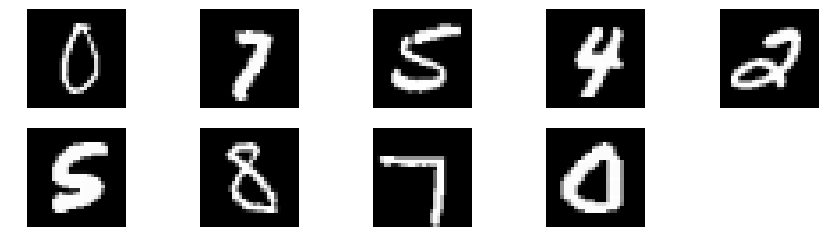

In [11]:
# Display some sample digit images
plt.figure(figsize=[15,4])
n_digits = 9
for n in range(n_digits):
    idx = np.random.randint(10000)
    plt.subplot(2,5,n+1)
    plt.imshow(np.reshape(test_in[idx], [28,28]), cmap='gray'); plt.axis('off');

In [15]:
mynet= Network.Network()
mynet.cost= CosineProximity
mynet.cost_p= CosineProximity_p
mynet.AddLayer(Network.Layer(784))
mynet.AddLayer(Network.Layer(50, 'logistic'))
mynet.AddLayer(Network.Layer(784, 'identity'))
mynet.SGD(train_in, train_in, 1, 80, 70)

array([[ 0.        , -0.27693932],
       [ 1.        , -0.43790203],
       [ 2.        , -0.53523296],
       [ 3.        , -0.58843621],
       [ 4.        , -0.61643626],
       [ 5.        , -0.63130657],
       [ 6.        , -0.63953229],
       [ 7.        , -0.64440754],
       [ 8.        , -0.64762345],
       [ 9.        , -0.64998426],
       [10.        , -0.65187678],
       [11.        , -0.65354847],
       [12.        , -0.65505783],
       [13.        , -0.65650445],
       [14.        , -0.65795127],
       [15.        , -0.65938674],
       [16.        , -0.66086279],
       [17.        , -0.66245418],
       [18.        , -0.66414133],
       [19.        , -0.6659783 ],
       [20.        , -0.66789398],
       [21.        , -0.66993113],
       [22.        , -0.67205396],
       [23.        , -0.67426216],
       [24.        , -0.67653331],
       [25.        , -0.67886036],
       [26.        , -0.6811572 ],
       [27.        , -0.68346973],
       [28.        ,

## (d) View Reconstructions

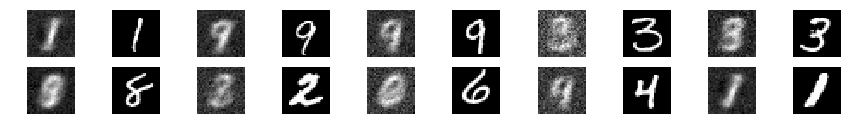

In [17]:
test_in = np.array(test[0][:10000])
out= mynet.FeedForward(test_in)

plt.figure(figsize=[15,4])
n_digits = 20
for n in range(0, n_digits, 2):
    idx = np.random.randint(10000)
    plt.subplot(4,10,n+1)
    plt.imshow(np.reshape(out[idx], [28,28]), cmap='gray'); plt.axis('off');
    plt.subplot(4,10,n+2)
    plt.imshow(np.reshape(test_in[idx], [28,28]), cmap='gray'); plt.axis('off');

# Q2: BPTT

## (a)

By chain rule
$$
\frac{\partial E}{\partial V} = \frac{\partial E}{\partial y} \frac{\partial y}{\partial z} \frac{\partial z}{\partial h}
$$
Since $E= \sum_{i=1}^{\tau} C(y^i,t^i)$
$$
\begin{align}
\frac{\partial E}{\partial V} &= \sum_{i=1}^{\tau} \left(\frac{C(y^i,t^i)}{\partial y^i}\odot\frac{\partial y^i}{\partial z^i}\right)\frac{\partial z^i}{\partial V} \\
&= \sum_{i=1}^{\tau} \left(\frac{C(y^i,t^i)}{\partial y^i}\odot\frac{\partial \sigma'(z^i)}{\partial z^i}\right)\frac{\partial}{\partial V}(Vh^i+c) \\
&= \sum_{i=1}^{\tau} \left(\frac{C(y^i,t^i)}{\partial y^i}\odot\sigma'(z^i)\right)(h^i)^T
\end{align}
$$


## (b)

By chain rule
$$
\frac{\partial E}{\partial U} = \sum_{i=1}^{\tau}\left(\frac{\partial E}{\partial h^i} \odot\frac{\partial h^i}{\partial s^i}\right)\frac{\partial s^i}{\partial U}
$$
Since $s=Ux^i+Wh^{i-1}+b$ and $h=\sigma(s)$
$$
\frac{\partial E}{\partial U} = \sum_{i=1}^{\tau}\left(\frac{\partial E}{\partial h^i} \odot\sigma'(s^{i})\right)(x^i)^T
$$

## (c)

By chain rule, $\frac{\partial E}{\partial W} = \frac{\partial E}{\partial h^i}\frac{\partial h^i}{\partial s^i}\frac{\partial s^i}{\partial W}$ for each iteration.
$$$$
Since $s=Ux^i+Wh^{i-1}+b$ and there is only i-1 iterations for W, we only need to calculate $\frac{\partial s^{i=2}}
{\partial W}$
$$$$for the smallest i.
$$$$
So
$$
\frac{\partial E}{\partial W} = \sum_{i=1}^{\tau-1}\left(\frac{\partial E}{\partial h^{i+1}} \odot\sigma'(s^{i+1})\right)(h^i)^T
$$

## (d)

Similar to 2(b), but we don't need to multiply by $(x^i)^T$, since $\frac{\partial(Ux^i+Wh^{i-1}+b)}{\partial b}=1$
$$$$
so
$$
\begin{align}
\frac{\partial E}{\partial b} 
&= \sum_{i=1}^{\tau}\left(\frac{\partial E}{\partial h^i} \odot\frac{\partial h^i}{\partial s^i}\right)\frac{\partial s^i}{\partial b} \\
&= \sum_{i=1}^{\tau}\left(\frac{\partial E}{\partial h^{i}} \odot\sigma'(s^{i})\right) 
\end{align}
$$

# Q3: RNN

## Read in the data

The code below creates two lists:
  - `sentences`, and
  - `next_chars`
  
Each list element represents a sequences of characters. There are 3 ways to represent a character:
1. As a string, eg. `'b'`
2. As an index to a character set, eg. `2`
3. As a one-hot vector, eg. `[0, 0, 1, 0, ...]`

The lists `sentences` and `next_chars` store the characters as indices (item 2 above). The utility functions
  - `char2vec`
  - `index2vec`
  - `vec2char`
  - `vec2index`
  
transform the characters between the 3 representations. You can also use the dictionaries `char_indices` and `indices_char` to convert between a string character and and index. The code below contains some examples.

In [11]:
import re
text = open('origin_of_species.txt').read().lower()
chars = sorted(list(set(text)))
chars.insert(0, "\0") #Add newline character
vocab_size = len(chars)

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
idx = [char_indices[c] for c in text]

# Let's simplify it by keeping only letters and spaces
filt_idx = []
for i in idx:
    if i<=24:
        filt_idx.append(2)
    elif i>24:
        filt_idx.append(i)
blah = ''.join([indices_char[f] for f in filt_idx])
text = re.sub(' +', ' ', blah)
chars = sorted(list(set(text)))
vocab_size = len(chars)
print('Character set: '+''.join(chars)+' (first char is a space)')

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
idx = [char_indices[c] for c in text]

print('There are '+str(vocab_size)+' characters in our character set')

''.join(indices_char[i] for i in idx[:70])

def char2vec(c):
    v = np.zeros(vocab_size)
    v[char_indices[c]] = 1.
    return v

def index2vec(i):
    v = np.zeros(vocab_size)
    v[i] = 1.
    return v

def vec2index(v):
    i = np.argmax(v)
    return i

def vec2char(v):
    return indices_char[vec2index(v)]

'''Form the dataset in sentences'''
sentences_length = 10
sentences = []
next_chars = []
for i in range(0, 10000 - sentences_length + 1):
    sentences.append(idx[i: i + sentences_length]) #Assume a sentence is made of X characters
    next_chars.append(idx[i + 1: i + sentences_length + 1]) #Offset by 1 to the right for the target

sentences = np.concatenate([[np.array(o)] for o in sentences[:-2]])
next_chars = np.concatenate([[np.array(o)] for o in next_chars[:-2]])
sentences.shape, next_chars.shape

def read_sentence(idx):
    return ''.join(indices_char[i] for i in idx)
for i in range(len(sentences)):
    print(read_sentence(sentences[i]))
print('Here is how you can view one of the samples:')
print('Sample input: ['+read_sentence(sentences[0])+']')

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Character set:  abcdefghijklmnopqrstuvwxyz (first char is a space)
There are 27 characters in our character set
on the ori
n the orig
 the origi
the origin
he origin 
e origin o
 origin of
origin of 
rigin of s
igin of sp
gin of spe
in of spec
n of speci
 of specie
of species
f species 
 species c
species ch
pecies cha
ecies char
cies charl
ies charle
es charles
s charles 
 charles d
charles da
harles dar
arles darw
rles darwi
les darwin
es darwin 
s darwin i
 darwin in
darwin int
arwin intr
rwin intro
win introd
in introdu
n introduc
 introduct
introducti
ntroductio
troduction
roduction 
oduction w
duction wh
uction whe
ction when
tion when 
ion when o
on when on
n when on 
 when on b
when on bo
hen on boa
en on boar
n on board
 on board 
on board h
n board h 
 board h m
board h m 
oard h m s
ard h m s 
rd h m s b
d h m s be
 h m s bea
h m s beag
 m s

hing in de
ing in det
ng in deta
g in detai
 in detail
in detail 
n detail a
 detail al
detail all
etail all 
tail all t
ail all th
il all the
l all the 
 all the f
all the fa
ll the fac
l the fact
 the facts
the facts 
he facts w
e facts wi
 facts wit
facts with
acts with 
cts with r
ts with re
s with ref
 with refe
with refer
ith refere
th referen
h referenc
 reference
references
eferences 
ferences o
erences on
rences on 
ences on w
nces on wh
ces on whi
es on whic
s on which
 on which 
on which m
n which my
 which my 
which my c
hich my co
ich my con
ch my conc
h my concl
 my conclu
my conclus
y conclusi
 conclusio
conclusion
onclusions
nclusions 
clusions h
lusions ha
usions hav
sions have
ions have 
ons have b
ns have be
s have bee
 have been
have been 
ave been g
ve been gr
e been gro
 been grou
been groun
een ground
en grounde
n grounded
 grounded 
grounded a
rounded an
ounded and
unded and 
nded and i
ded and i 
ed and i h
d and i ho
 and i hop
and i hope
nd i hope 
d i hope i

e mutual a
 mutual af
mutual aff
utual affi
tual affin
ual affini
al affinit
l affiniti
 affinitie
affinities
ffinities 
finities o
inities of
nities of 
ities of o
ties of or
ies of org
es of orga
s of organ
 of organi
of organic
f organic 
 organic b
organic be
rganic bei
ganic bein
anic being
nic beings
ic beings 
c beings o
 beings on
beings on 
eings on t
ings on th
ngs on the
gs on thei
s on their
 on their 
on their e
n their em
 their emb
their embr
heir embry
eir embryo
ir embryol
r embryolo
 embryolog
embryologi
mbryologic
bryologica
ryological
yological 
ological r
logical re
ogical rel
gical rela
ical relat
cal relati
al relatio
l relation
 relations
relations 
elations t
lations th
ations the
tions thei
ions their
ons their 
ns their g
s their ge
 their geo
their geog
heir geogr
eir geogra
ir geograp
r geograph
 geographi
geographic
eographica
ographical
graphical 
raphical d
aphical di
phical dis
hical dist
ical distr
cal distri
al distrib
l distribu
 distribut
distributi

ent from c
nt from ce
t from cer
 from cert
from certa
rom certai
om certain
m certain 
 certain t
certain tr
ertain tre
rtain tree
tain trees
ain trees 
in trees w
n trees wh
 trees whi
trees whic
rees which
ees which 
es which h
s which ha
 which has
which has 
hich has s
ich has se
ch has see
h has seed
 has seeds
has seeds 
as seeds t
s seeds th
 seeds tha
seeds that
eeds that 
eds that m
ds that mu
s that mus
 that must
that must 
hat must b
at must be
t must be 
 must be t
must be tr
ust be tra
st be tran
t be trans
 be transp
be transpo
e transpor
 transport
transporte
ransported
ansported 
nsported b
sported by
ported by 
orted by c
rted by ce
ted by cer
ed by cert
d by certa
 by certai
by certain
y certain 
 certain b
certain bi
ertain bir
rtain bird
tain birds
ain birds 
in birds a
n birds an
 birds and
birds and 
irds and w
rds and wh
ds and whi
s and whic
 and which
and which 
nd which h
d which ha
 which has
which has 
hich has f
ich has fl
ch has flo
h has flow
 has flowe

 possibly 
possibly s
ossibly su
ssibly sur
sibly surv
ibly survi
bly surviv
ly survive
y survive 
 survive a
survive an
urvive and
rvive and 
vive and a
ive and as
ve and as 
e and as c
 and as co
and as con
nd as cons
d as conse
 as conseq
as consequ
s conseque
 consequen
consequent
onsequentl
nsequently
sequently 
equently t
quently th
uently the
ently ther
ntly there
tly there 
ly there i
y there is
 there is 
there is a
here is a 
ere is a f
re is a fr
e is a fre
 is a freq
is a frequ
s a freque
 a frequen
a frequent
 frequentl
frequently
requently 
equently r
quently re
uently rec
ently recu
ntly recur
tly recurr
ly recurri
y recurrin
 recurring
recurring 
ecurring s
curring st
urring str
rring stru
ring strug
ing strugg
ng struggl
g struggle
 struggle 
struggle f
truggle fo
ruggle for
uggle for 
ggle for e
gle for ex
le for exi
e for exis
 for exist
for existe
or existen
r existenc
 existence
existence 
xistence i
istence it
stence it 
tence it f
ence it fo
nce it fol
ce it foll

 species a
species an
pecies and
ecies and 
cies and t
ies and th
es and the
s and the 
 and the f
and the fe
nd the fer
d the fert
 the ferti
the fertil
he fertili
e fertilit
 fertility
fertility 
ertility o
rtility of
tility of 
ility of v
lity of va
ity of var
ty of vari
y of varie
 of variet
of varieti
f varietie
 varieties
varieties 
arieties w
rieties wh
ieties whe
eties when
ties when 
ies when i
es when in
s when int
 when inte
when inter
hen interc
en intercr
n intercro
 intercros
intercross
ntercrosse
tercrossed
ercrossed 
rcrossed a
crossed an
rossed and
ossed and 
ssed and f
sed and fo
ed and fou
d and four
 and fourt
and fourth
nd fourthl
d fourthly
 fourthly 
fourthly t
ourthly th
urthly the
rthly the 
thly the i
hly the im
ly the imp
y the impe
 the imper
the imperf
he imperfe
e imperfec
 imperfect
imperfecti
mperfectio
perfection
erfection 
rfection o
fection of
ection of 
ction of t
tion of th
ion of the
on of the 
n of the g
 of the ge
of the geo
f the geol
 the geolo

ermore i a
rmore i am
more i am 
ore i am c
re i am co
e i am con
 i am conv
i am convi
 am convin
am convinc
m convince
 convinced
convinced 
onvinced t
nvinced th
vinced tha
inced that
nced that 
ced that n
ed that na
d that nat
 that natu
that natur
hat natura
at natural
t natural 
 natural s
natural se
atural sel
tural sele
ural selec
ral select
al selecti
l selectio
 selection
selection 
election h
lection ha
ection has
ction has 
tion has b
ion has be
on has bee
n has been
 has been 
has been t
as been th
s been the
 been the 
been the m
een the ma
en the mai
n the main
 the main 
the main b
he main bu
e main but
 main but 
main but n
ain but no
in but not
n but not 
 but not e
but not ex
ut not exc
t not excl
 not exclu
not exclus
ot exclusi
t exclusiv
 exclusive
exclusive 
xclusive m
clusive me
lusive mea
usive mean
sive means
ive means 
ve means o
e means of
 means of 
means of m
eans of mo
ans of mod
ns of modi
s of modif
 of modifi
of modific
f modifica
 modificat
modificati

## Some utility functions

In [3]:
def sigma(z):
    return np.clip(z, a_min=0, a_max=None)  # ReLU
    #return 1./(1+np.exp(-z))  # use this for logistic

def sigma_primed(y):
    return np.clip(np.sign(y), a_min=0, a_max=1)  # Derivative of ReLU
    #return y*(1.-y)  # use this for logistic

def softmax(z):
    ez = np.exp(z)
    denom = np.sum(ez)
    return ez / denom

def CrossEntropy(y, t):
    return -sum(t*np.log(y))

## (a) Complete BPTT

In [29]:
class RNN():
    
    def __init__(self, dims, seq_length=10):
        '''
         Input:
           dims is [X, H, Y], where the input has layer has X neurons, the
                hidden layer has H neurons, and the output layer has Y neurons.
           seq_length is how many steps to unroll the RNN through time
                (this is the same as tau in the lecture notes)
        '''
        self.X, self.H, self.Y = dims
        self.seq_length = seq_length
        # Input layer
        self.xs = [np.zeros(self.X) for x in range(seq_length)] # activity
        # Hidden layer
        self.hs = [np.zeros(self.H) for x in range(seq_length)] # activity
        # Output layer
        self.ys = [np.zeros(self.Y) for x in range(seq_length)] # activity
        
        # Connection weights
        self.U = np.random.normal(size=[self.H, self.X])/np.sqrt(self.X) # input->hidden
        self.W = np.random.normal(size=[self.H, self.H])/np.sqrt(self.H) # hidden->hidden
        self.V = np.random.normal(size=[self.Y, self.H])/np.sqrt(self.H) # hidden->output
        self.b = np.zeros(self.H) # biases for hidden nodes
        self.c = np.zeros(self.Y) # biases for output nodes
        
    def ForwardTT(self, seq_in):
        '''
         i = ForwardTT(seq_in)
        
         Propagates the RNN forward through time, saving all the intermediate
         states that will be needed for backprop through time (BPTT).
        
         Input:
           seq_in is a vector of indecies, with self.seq_length elements.
        
         Output:
           i is the index of the character predicted to follow the input.
         
         This method's main purpose is to update the states of the activites
         in the time-unrolled network.
        '''
        self.xs[0] = index2vec(seq_in[0]) # convert to character vector
        
        # Starting input current for hidden nodes
        ss = np.dot(self.U, self.xs[0]) + self.b
        self.hs[0] = sigma(ss)  # Activation of hidden nodes
        
        # Input current for output nodes
        zs = np.dot(self.V, self.hs[0]) + self.c
        self.ys[0] = softmax(zs)  # Activation of output nodes
        
        # Now process forward in time
        for i in range(1, self.seq_length):
            self.xs[i] = index2vec(seq_in[i])  # input vector
            
            # Input current for hidden nodes, including recurrent connections
            ss = np.dot(self.U, self.xs[i]) + np.dot(self.W, self.hs[i-1]) + self.b
            self.hs[i] = sigma(ss)  # Activation
            
            # Input current for output nodes
            zs = np.dot(self.V, self.hs[i]) + self.c
            self.ys[i] = softmax(zs)  # Activation
            
        # Might as well output the final state of the output
        return vec2index(self.ys[-1])
    
    
    def BPTT(self, seq_in, seq_out):
        '''
         BPTT(seq_in, seq_out)
         
         Performs backprop through time on one sample given by the input and
         output sequence.
         
         Input:
           seq_in is a vector of indices specifying the input sequence of
                   characters.
           seq_out is a vector of indices specifying the output sequence of
                   characters. Typically, seq_out is the same as seq_in, but
                   shifted by 1 character.
         
         Output:
           None, but the connection weights and biases are updated.
        '''
        # Initialize gradients to zero
        self.dEdV = np.zeros(np.shape(self.V))
        self.dEdW = np.zeros(np.shape(self.W))
        self.dEdU = np.zeros(np.shape(self.U))
        self.dEdb = np.zeros(np.shape(self.b))
        self.dEdc = np.zeros(np.shape(self.c))
        
        # ===================
        # ===================
        # =  YOUR CODE HERE =
        # ===================
        # ===================
        dEdz = []
        ## Note that we don't have sigma prime here because Porf Orchard said on piazza that it was simply (y-t)
        for i in range(self.seq_length):
            dEdz.append(self.ys[i] - index2vec(seq_out[i]))
        dEds = [0]*self.seq_length
        dEds[-1] = sigma_primed(self.hs[-1]) * (self.V.T@dEdz[-1])
        for i in range(self.seq_length - 2, -1, -1):
            dEds[i] = sigma_primed(self.hs[i])*((self.V.T@dEdz[i])+(self.W.T@dEds[i+1]))
        for i in range(self.seq_length):
            self.dEdb += dEds[i]
            self.dEdc += dEdz[i]  
            self.dEdV += np.array([dEdz[i]]).T@np.array([self.hs[i]])
            self.dEdU += np.array([dEds[i]]).T@np.array([self.xs[i]])
            if(i != self.seq_length-1):
                self.dEdW += np.array([dEds[i+1]]).T@np.array([self.hs[i]])
            
       
    def Generate(self, n=1):
        '''
         c = Generate(n=1)
         
         Runs the RNN from the last state after running ForwardTT, outputting
         the next n characters.
         
         Input:
           n is the number of characters you want to predict
           
         Output:
           c is a string of n characters
        '''
        y = self.ys[-1]  # Final output of ForwardTT
        c = vec2char(y)  # Convert it to a character string
        h = self.hs[-1]  # Starting with last hidden state...
        # Loop forward in time
        # (no need to record states, since we won't be doing BPTT)
        for nn in range(n-1):
            x = copy.copy(y)  # Use last output as next input
            
            # Input current for hidden nodes
            s = np.dot(self.U, x) + np.dot(self.W, h) + self.b
            h = sigma(s)  # Activation
            
            # Input current for output nodes
            z = np.dot(self.V, h) + self.c
            y = softmax(z)  # Activation
            
            # And add the next character to our output string
            c += vec2char(y)
            
        return c
            
    def Evaluate(self, train_in, train_out):
        '''
         loss = Evaluate(train_in, train_out)
         
         Evaluates the network on the supplied dataset.
         
         Input:
           train_in is a list of input sequences (see ForwardTT for format of input)
           train_out is the corresponding list of output sequences
           
         Output:
           loss is the average cross entropy
        '''
        val = 0.
        for x, t in zip(train_in, train_out):
            self.ForwardTT(x)
            for i in range(self.seq_length):
                val += CrossEntropy(self.ys[i], index2vec(t[i]))
        return val/len(train_in)
            
    def Train(self, train_in, train_out, kappa=0.05, epochs=1):
        '''
         Train(train_in, train_out, kappa=0.05, epochs=1)
         
         Performs epochs of gradient descent, performing BPTT after each sample.
         
         Input:
           train_in and train_out is the training dataset
           kappa is the learning rate
           epochs is the number of times to go through the dataset
           
         Output:
           None, but the connection weights and biases are updated
        '''
        # Loop over epochs
        for e in range(epochs):
            
            # Shuffle the training data
            data_shuffled = list(zip(train_in, train_out))
            np.random.shuffle(data_shuffled)
            
            # x: input 
            # t: target
            for x, t in data_shuffled:
                self.ForwardTT(x)  # Forward through time
                self.BPTT(x, t)    # Backprop through time
                # Note that BPTT starts by resetting the gradients to zero.
                
                # Apply update to connection weights and biases
                self.V -= kappa*self.dEdV
                self.U -= kappa*self.dEdU
                self.W -= kappa*self.dEdW
                self.b -= kappa*self.dEdb
                self.c -= kappa*self.dEdc

            print('Epoch '+str(e)+', Loss = '+str(self.Evaluate(train_in, train_out)))

## (b) Create the RNN

In [30]:
# YOUR CODE HERE
net = RNN([27,400,27])

In [31]:
net.Train(sentences, next_chars, kappa = 0.001, epochs = 15)


(9989, 2, 10)
[(array([ 5, 19,  0,  1, 18,  5,  0, 20,  8,  5]), array([19,  0,  1, 18,  5,  0, 20,  8,  5,  0])), (array([ 5, 19,  5,  0,  6,  1,  3, 20, 19,  0]), array([19,  5,  0,  6,  1,  3, 20, 19,  0, 19])), (array([23,  5, 18,  0, 20, 15,  0, 20,  8,  5]), array([ 5, 18,  0, 20, 15,  0, 20,  8,  5,  0])), (array([14,  0,  2,  5,  0,  3,  8,  1, 14,  7]), array([ 0,  2,  5,  0,  3,  8,  1, 14,  7,  5])), (array([ 0, 13,  1,  9, 14,  0,  2, 21, 20,  0]), array([13,  1,  9, 14,  0,  2, 21, 20,  0, 14])), (array([ 2,  5,  9, 14,  7,  0, 15, 18,  0,  5]), array([ 5,  9, 14,  7,  0, 15, 18,  0,  5, 12])), (array([ 7,  1, 14,  0, 19,  5,  3, 15, 14,  4]), array([ 1, 14,  0, 19,  5,  3, 15, 14,  4, 12])), (array([19,  1,  2, 12,  5,  0, 20, 15,  0, 16]), array([ 1,  2, 12,  5,  0, 20, 15,  0, 16, 21])), (array([ 9, 14,  7, 19,  0, 20,  8, 18, 15, 21]), array([14,  7, 19,  0, 20,  8, 18, 15, 21,  7])), (array([ 0,  4, 15,  3, 20, 18,  9, 14,  5,  0]), array([ 4, 15,  3, 20, 18,  9, 14, 

x: 
[19  0 15  6  0 15 18  7  1 14]
t: 
[ 0 15  6  0 15 18  7  1 14  9]
x: 
[ 9 15 14  0 23  5  0 19  8  1]
t: 
[15 14  0 23  5  0 19  8  1 12]
x: 
[15 18  0 20  8  5  0  9 14  6]
t: 
[18  0 20  8  5  0  9 14  6  5]
x: 
[21 20 21  1 12  0  1  6  6  9]
t: 
[20 21  1 12  0  1  6  6  9 14]
x: 
[12 25  0  2  5  0  9 13 16  5]
t: 
[25  0  2  5  0  9 13 16  5 18]
x: 
[14 20  5 18  9 14  7  0 15 14]
t: 
[20  5 18  9 14  7  0 15 14  0]
x: 
[15  0 19  8 15 23  0 20  8  1]
t: 
[ 0 19  8 15 23  0 20  8  1 20]
x: 
[20  0 15  3  3 21 18 18  5  4]
t: 
[ 0 15  3  3 21 18 18  5  4  0]
x: 
[15  0 20  8  5  9 18  0 16  8]
t: 
[ 0 20  8  5  9 18  0 16  8 25]
x: 
[ 9 14  6  5 18 20  9 12  9 20]
t: 
[14  6  5 18 20  9 12  9 20 25]
x: 
[22  9 19  1  2 12  5  0 20 15]
t: 
[ 9 19  1  2 12  5  0 20 15  0]
x: 
[23  8  9  3  8  0  9  0  8  1]
t: 
[ 8  9  3  8  0  9  0  8  1 22]
x: 
[ 2 12  5  0  3  1 21 19  5  0]
t: 
[12  5  0  3  1 21 19  5  0 15]
x: 
[ 8  5  0 14  5  3  5 19 19  9]
t: 
[ 5  0 14  5  3  5 19 19

x: 
[ 9  0  3  1 14  0  5 14 20  5]
t: 
[ 0  3  1 14  0  5 14 20  5 18]
x: 
[20 15  0  2 18  9 14  7  0 16]
t: 
[15  0  2 18  9 14  7  0 16 15]
x: 
[ 0 20  8  5  0 22  9  5 23  0]
t: 
[20  8  5  0 22  9  5 23  0 23]
x: 
[19  5  5 13  5  4  0 20 15  0]
t: 
[ 5  5 13  5  4  0 20 15  0 13]
x: 
[18  0  9  0 19  8  1 12 12  0]
t: 
[ 0  9  0 19  8  1 12 12  0  7]
x: 
[14  3  9 16 12  5  0 15  6  0]
t: 
[ 3  9 16 12  5  0 15  6  0  9]
x: 
[18  5 17 21  5 19 20  0 20  8]
t: 
[ 5 17 21  5 19 20  0 20  8  1]
x: 
[18 14  1 12  0  3 15 14  4  9]
t: 
[14  1 12  0  3 15 14  4  9 20]
x: 
[15  7 21  5 19  0 15  6  0  6]
t: 
[ 7 21  5 19  0 15  6  0  6  1]
x: 
[16  5  3  9  5 19  0  1 18  5]
t: 
[ 5  3  9  5 19  0  1 18  5  0]
x: 
[20  8  0  9 20 19  0 18  5 12]
t: 
[ 8  0  9 20 19  0 18  5 12  1]
x: 
[ 5 18 25  0  3 15 13 13 15 14]
t: 
[18 25  0  3 15 13 13 15 14 12]
x: 
[ 0  6  1  3 20 19  0  3  1 14]
t: 
[ 6  1  3 20 19  0  3  1 14 14]
x: 
[ 0 18  5 13  1  9 14 19  0 15]
t: 
[18  5 13  1  9 14 19  0

x: 
[14  3 12 21 19  9 15 14 19  0]
t: 
[ 3 12 21 19  9 15 14 19  0  8]
x: 
[ 4  0 20 15 14  7 21  5  0 19]
t: 
[ 0 20 15 14  7 21  5  0 19 15]
x: 
[ 5  4  0 19 15  0  1 19  0 20]
t: 
[ 4  0 19 15  0  1 19  0 20 15]
x: 
[ 9  3  1 12  0 16 15 23  5 18]
t: 
[ 3  1 12  0 16 15 23  5 18 19]
x: 
[ 5  0 16  1 19 20  0  9 14  8]
t: 
[ 0 16  1 19 20  0  9 14  8  1]
x: 
[ 4 21  3  5  4  0 20 15  0  4]
t: 
[21  3  5  4  0 20 15  0  4 15]
x: 
[ 0 19  5  5 13  5  4  0 20 15]
t: 
[19  5  5 13  5  4  0 20 15  0]
x: 
[ 5 19  0  4  1 18 23  9 14  0]
t: 
[19  0  4  1 18 23  9 14  0  9]
x: 
[ 9 13 13 21 20  1  2 12  5  0]
t: 
[13 13 21 20  1  2 12  5  0  2]
x: 
[25  5 20  0 21 14  5 24 16 12]
t: 
[ 5 20  0 21 14  5 24 16 12  1]
x: 
[13 25  0  1  3  3 21 18  1  3]
t: 
[25  0  1  3  3 21 18  1  3 25]
x: 
[18  0 13 15 18  5  0  9 13 16]
t: 
[ 0 13 15 18  5  0  9 13 16 15]
x: 
[ 0  2 18  9 14  7  0 16 15 12]
t: 
[ 2 18  9 14  7  0 16 15 12 12]
x: 
[ 9  0  8 15 16  5  0  9 14  0]
t: 
[ 0  8 15 16  5  0  9 14

x: 
[ 0 15 14  0 20  8  5  0 13 21]
t: 
[15 14  0 20  8  5  0 13 21 20]
x: 
[ 0 20 15  0 22  1 18  9  1 20]
t: 
[20 15  0 22  1 18  9  1 20  9]
x: 
[ 8  5  0  2  1 18 11  0 15  6]
t: 
[ 5  0  2  1 18 11  0 15  6  0]
x: 
[ 1 14  4  0  1 19  0 13 25  0]
t: 
[14  4  0  1 19  0 13 25  0  8]
x: 
[ 3 15 13  5  0 20 15  0 20  8]
t: 
[15 13  5  0 20 15  0 20  8  5]
x: 
[ 5  0  9 14  0 18  5  7  1 18]
t: 
[ 0  9 14  0 18  5  7  1 18  4]
x: 
[ 5 18 12 25  0  5 14 20  5 18]
t: 
[18 12 25  0  5 14 20  5 18 20]
x: 
[ 5  5 14  0 21 18  7  5  4  0]
t: 
[ 5 14  0 21 18  7  5  4  0 20]
x: 
[ 0 15 18  7  1 14  9  3  0  2]
t: 
[15 18  7  1 14  9  3  0  2  5]
x: 
[ 0  8  1  4  0 14 15 20  0  2]
t: 
[ 8  1  4  0 14 15 20  0  2  5]
x: 
[18  9  7  9 14  0 15  6  0 19]
t: 
[ 9  7  9 14  0 15  6  0 19 16]
x: 
[16 18 15  6 15 21 14  4  0  9]
t: 
[18 15  6 15 21 14  4  0  9  7]
x: 
[19 20 18 21  3 20 21 18  5  0]
t: 
[20 18 21  3 20 21 18  5  0  1]
x: 
[ 1  9 14  5  4  0  9 14  0 18]
t: 
[ 9 14  5  4  0  9 14  0

KeyboardInterrupt: 

In [19]:
for sentence in sentences:
    print(read_sentence(sentence))
for chars in next_chars:
    print(read_sentence(chars))

on the ori
n the orig
 the origi
the origin
he origin 
e origin o
 origin of
origin of 
rigin of s
igin of sp
gin of spe
in of spec
n of speci
 of specie
of species
f species 
 species c
species ch
pecies cha
ecies char
cies charl
ies charle
es charles
s charles 
 charles d
charles da
harles dar
arles darw
rles darwi
les darwin
es darwin 
s darwin i
 darwin in
darwin int
arwin intr
rwin intro
win introd
in introdu
n introduc
 introduct
introducti
ntroductio
troduction
roduction 
oduction w
duction wh
uction whe
ction when
tion when 
ion when o
on when on
n when on 
 when on b
when on bo
hen on boa
en on boar
n on board
 on board 
on board h
n board h 
 board h m
board h m 
oard h m s
ard h m s 
rd h m s b
d h m s be
 h m s bea
h m s beag
 m s beagl
m s beagle
 s beagle 
s beagle a
 beagle as
beagle as 
eagle as n
agle as na
gle as nat
le as natu
e as natur
 as natura
as natural
s naturali
 naturalis
naturalist
aturalist 
turalist i
uralist i 
ralist i w
alist i wa
list i was
ist i was 

ssity of h
sity of he
ity of her
ty of here
y of herea
 of hereaf
of hereaft
f hereafte
 hereafter
hereafter 
ereafter p
reafter pu
eafter pub
after publ
fter publi
ter publis
er publish
r publishi
 publishin
publishing
ublishing 
blishing i
lishing in
ishing in 
shing in d
hing in de
ing in det
ng in deta
g in detai
 in detail
in detail 
n detail a
 detail al
detail all
etail all 
tail all t
ail all th
il all the
l all the 
 all the f
all the fa
ll the fac
l the fact
 the facts
the facts 
he facts w
e facts wi
 facts wit
facts with
acts with 
cts with r
ts with re
s with ref
 with refe
with refer
ith refere
th referen
h referenc
 reference
references
eferences 
ferences o
erences on
rences on 
ences on w
nces on wh
ces on whi
es on whic
s on which
 on which 
on which m
n which my
 which my 
which my c
hich my co
ich my con
ch my conc
h my concl
 my conclu
my conclus
y conclusi
 conclusio
conclusion
onclusions
nclusions 
clusions h
lusions ha
usions hav
sions have
ions have 
ons have b

 which dra
which draw
hich draws
ich draws 
ch draws i
h draws it
 draws its
draws its 
raws its n
aws its no
ws its nou
s its nour
 its nouri
its nouris
ts nourish
s nourishm
 nourishme
nourishmen
ourishment
urishment 
rishment f
ishment fr
shment fro
hment from
ment from 
ent from c
nt from ce
t from cer
 from cert
from certa
rom certai
om certain
m certain 
 certain t
certain tr
ertain tre
rtain tree
tain trees
ain trees 
in trees w
n trees wh
 trees whi
trees whic
rees which
ees which 
es which h
s which ha
 which has
which has 
hich has s
ich has se
ch has see
h has seed
 has seeds
has seeds 
as seeds t
s seeds th
 seeds tha
seeds that
eeds that 
eds that m
ds that mu
s that mus
 that must
that must 
hat must b
at must be
t must be 
 must be t
must be tr
ust be tra
st be tran
t be trans
 be transp
be transpo
e transpor
 transport
transporte
ransported
ansported 
nsported b
sported by
ported by 
orted by c
rted by ce
ted by cer
ed by cert
d by certa
 by certai
by certain
y certain 

ical power
cal powers
al powers 
l powers o
 powers of
powers of 
owers of i
wers of in
ers of inc
rs of incr
s of incre
 of increa
of increas
f increase
 increase 
increase w
ncrease wi
crease wil
rease will
ease will 
ase will b
se will be
e will be 
 will be t
will be tr
ill be tre
ll be trea
l be treat
 be treate
be treated
e treated 
 treated o
treated of
reated of 
eated of t
ated of th
ted of thi
ed of this
d of this 
 of this i
of this is
f this is 
 this is t
this is th
his is the
is is the 
s is the d
 is the do
is the doc
s the doct
 the doctr
the doctri
he doctrin
e doctrine
 doctrine 
doctrine o
octrine of
ctrine of 
trine of m
rine of ma
ine of mal
ne of malt
e of malth
 of malthu
of malthus
f malthus 
 malthus a
malthus ap
althus app
lthus appl
thus appli
hus applie
us applied
s applied 
 applied t
applied to
pplied to 
plied to t
lied to th
ied to the
ed to the 
d to the w
 to the wh
to the who
o the whol
 the whole
the whole 
he whole a
e whole an
 whole ani
whole anim

tion throu
ion throug
on through
n througho
 throughou
throughout
hroughout 
roughout s
oughout sp
ughout spa
ghout spac
hout space
out space 
ut space i
t space in
 space in 
space in t
pace in th
ace in the
ce in the 
e in the t
 in the th
in the thi
n the thir
 the thirt
the thirte
he thirtee
e thirteen
 thirteent
thirteenth
hirteenth 
irteenth t
rteenth th
teenth the
eenth thei
enth their
nth their 
th their c
h their cl
 their cla
their clas
heir class
eir classi
ir classif
r classifi
 classific
classifica
lassificat
assificati
ssificatio
sification
ification 
fication o
ication or
cation or 
ation or m
tion or mu
ion or mut
on or mutu
n or mutua
 or mutual
or mutual 
r mutual a
 mutual af
mutual aff
utual affi
tual affin
ual affini
al affinit
l affiniti
 affinitie
affinities
ffinities 
finities b
inities bo
nities bot
ities both
ties both 
ies both w
es both wh
s both whe
 both when
both when 
oth when m
th when ma
h when mat
 when matu
when matur
hen mature
en mature 
n mature a

me object 
e object i
 object i 
object i h
bject i ho
ject i hop
ect i hope
ct i hope 
t i hope t
 i hope th
i hope tha
 hope that
hope that 
ope that i
pe that i 
e that i m
 that i ma
that i may
hat i may 
at i may b
t i may be
 i may be 
i may be e
 may be ex
may be exc
ay be excu
y be excus
 be excuse
be excused
e excused 
 excused f
excused fo
xcused for
cused for 
used for e
sed for en
ed for ent
d for ente
 for enter
for enteri
or enterin
r entering
 entering 
entering o
ntering on
tering on 
ering on t
ring on th
ing on the
ng on thes
g on these
 on these 
on these p
n these pe
 these per
these pers
hese perso
ese person
se persona
e personal
 personal 
personal d
ersonal de
rsonal det
sonal deta
onal detai
nal detail
al details
l details 
 details a
details as
etails as 
tails as i
ails as i 
ils as i g
ls as i gi
s as i giv
 as i give
as i give 
s i give t
 i give th
i give the
 give them
give them 
ive them t
ve them to
e them to 
 them to s
them to sh
hem to sho
em to show

reflecting
eflecting 
flecting o
lecting on
ecting on 
cting on t
ting on th
ing on the
ng on the 
g on the m
 on the mu
on the mut
n the mutu
 the mutua
the mutual
he mutual 
e mutual a
 mutual af
mutual aff
utual affi
tual affin
ual affini
al affinit
l affiniti
 affinitie
affinities
ffinities 
finities o
inities of
nities of 
ities of o
ties of or
ies of org
es of orga
s of organ
 of organi
of organic
f organic 
 organic b
organic be
rganic bei
ganic bein
anic being
nic beings
ic beings 
c beings o
 beings on
beings on 
eings on t
ings on th
ngs on the
gs on thei
s on their
 on their 
on their e
n their em
 their emb
their embr
heir embry
eir embryo
ir embryol
r embryolo
 embryolog
embryologi
mbryologic
bryologica
ryological
yological 
ological r
logical re
ogical rel
gical rela
ical relat
cal relati
al relatio
l relation
 relations
relations 
elations t
lations th
ations the
tions thei
ions their
ons their 
ns their g
s their ge
 their geo
their geog
heir geogr
eir geogra
ir geograp

ion at the
on at the 
n at the c
 at the co
at the com
t the comm
 the comme
the commen
he commenc
e commence
 commencem
commenceme
ommencemen
mmencement
mencement 
encement o
ncement of
cement of 
ement of m
ment of my
ent of my 
nt of my o
t of my ob
 of my obs
of my obse
f my obser
 my observ
my observa
y observat
 observati
observatio
bservation
servations
ervations 
rvations i
vations it
ations it 
tions it s
ions it se
ons it see
ns it seem
s it seeme
 it seemed
it seemed 
t seemed t
 seemed to
seemed to 
eemed to m
emed to me
med to me 
ed to me p
d to me pr
 to me pro
to me prob
o me proba
 me probab
me probabl
e probable
 probable 
probable t
robable th
obable tha
bable that
able that 
ble that a
le that a 
e that a c
 that a ca
that a car
hat a care
at a caref
t a carefu
 a careful
a careful 
 careful s
careful st
areful stu
reful stud
eful study
ful study 
ul study o
l study of
 study of 
study of d
tudy of do
udy of dom
dy of dome
y of domes
 of domest
of domesti
f domestic

mple being
ple being 
le being o
e being or
 being or 
being or a
eing or a 
ing or a s
ng or a si
g or a sim
 or a simp
or a simpl
r a simple
 a simple 
a simple o
 simple or
simple org
imple orga
mple organ
ple organ 
le organ c
e organ ca
 organ can
organ can 
rgan can b
gan can be
an can be 
n can be c
 can be ch
can be cha
an be chan
n be chang
 be change
be changed
e changed 
 changed a
changed an
hanged and
anged and 
nged and p
ged and pe
ed and per
d and perf
 and perfe
and perfec
nd perfect
d perfecte
 perfected
perfected 
erfected i
rfected in
fected int
ected into
cted into 
ted into a
ed into a 
d into a h
 into a hi
into a hig
nto a high
to a highl
o a highly
 a highly 
a highly d
 highly de
highly dev
ighly deve
ghly devel
hly develo
ly develop
y develope
 developed
developed 
eveloped b
veloped be
eloped bei
loped bein
oped being
ped being 
ed being o
d being or
 being or 
being or e
eing or el
ing or ela
ng or elab
g or elabo
 or elabor
or elabora
r elaborat
 elaborate

## (c) Train

In [6]:
# YOUR CODE HERE
net.Train(sentences, next_chars, kappa = 0.001, epochs = 15)

Epoch 0, Loss = 19.253854406533637
Epoch 1, Loss = 16.459746440211795
Epoch 2, Loss = 14.612397799816458
Epoch 3, Loss = 13.276092666641647
Epoch 4, Loss = 12.137086990237332
Epoch 5, Loss = 11.215529413025603
Epoch 6, Loss = 10.625980540712858
Epoch 7, Loss = 10.024590286033657
Epoch 8, Loss = 9.548312744636899
Epoch 9, Loss = 9.182227364236368
Epoch 10, Loss = 8.974832564847826
Epoch 11, Loss = 8.73583031045445
Epoch 12, Loss = 8.567455778358688
Epoch 13, Loss = 8.501636613106513
Epoch 14, Loss = 8.307370979020181


In [ ]:
# You might opt to have more than one train command, using different
# learning rates and numbers of epochs. Each one builds on the results
# from the last run.
#net.Train(...)

## (d) Evaluate

In [8]:
# A sample continuation.
n = 38
b= net
b.ForwardTT(sentences[n])
blah = read_sentence(sentences[n])
print('Input:      '+blah)
print('Prediction: '+blah+b.Generate(5))
print('Actual:     '+blah+read_sentence(sentences[n+10]))

Input:      n introduc
Prediction: n introduction 
Actual:     n introduction when 


In [9]:
blah = 'harles dar'
x = [char_indices[c] for c in blah]
b.ForwardTT(x)
print(blah)
print(blah+b.Generate(10))

harles dar
harles darwin is the


In [10]:
count = 0
for i in range(len(sentences)):
    net.ForwardTT(sentences[i])
    nextchar = vec2char(index2vec(next_chars[i][-1]))
    if net.Generate() == nextchar:
        count += 1

print("correct time:"+str(count))
print("Accuracy:" +str(count/len(sentences) * 100) + "%")

correct time:9402
Accuracy:94.12353588947843%
